In [24]:
# lets start with importing necessary library
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels as sm
import matplotlib.pyplot as plt    
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [25]:
# read CSV file and convert into dataframe
data=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [26]:
#understand data at high level.check stats of data set
data.describe()    # features are input variable ,chance of admit is label (output)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [27]:
#fill nan value
#mode() fill nan for categorical data [0] is always better to chose eg. [1,2,1,2,3,5,1,2,1,2] mode[0] always give first num
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

In [28]:
#verify if Nan's fill
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [29]:
# drop column serial no as no use
data=data.drop(columns=['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


            lets vizulaise independent and dependednt variable 

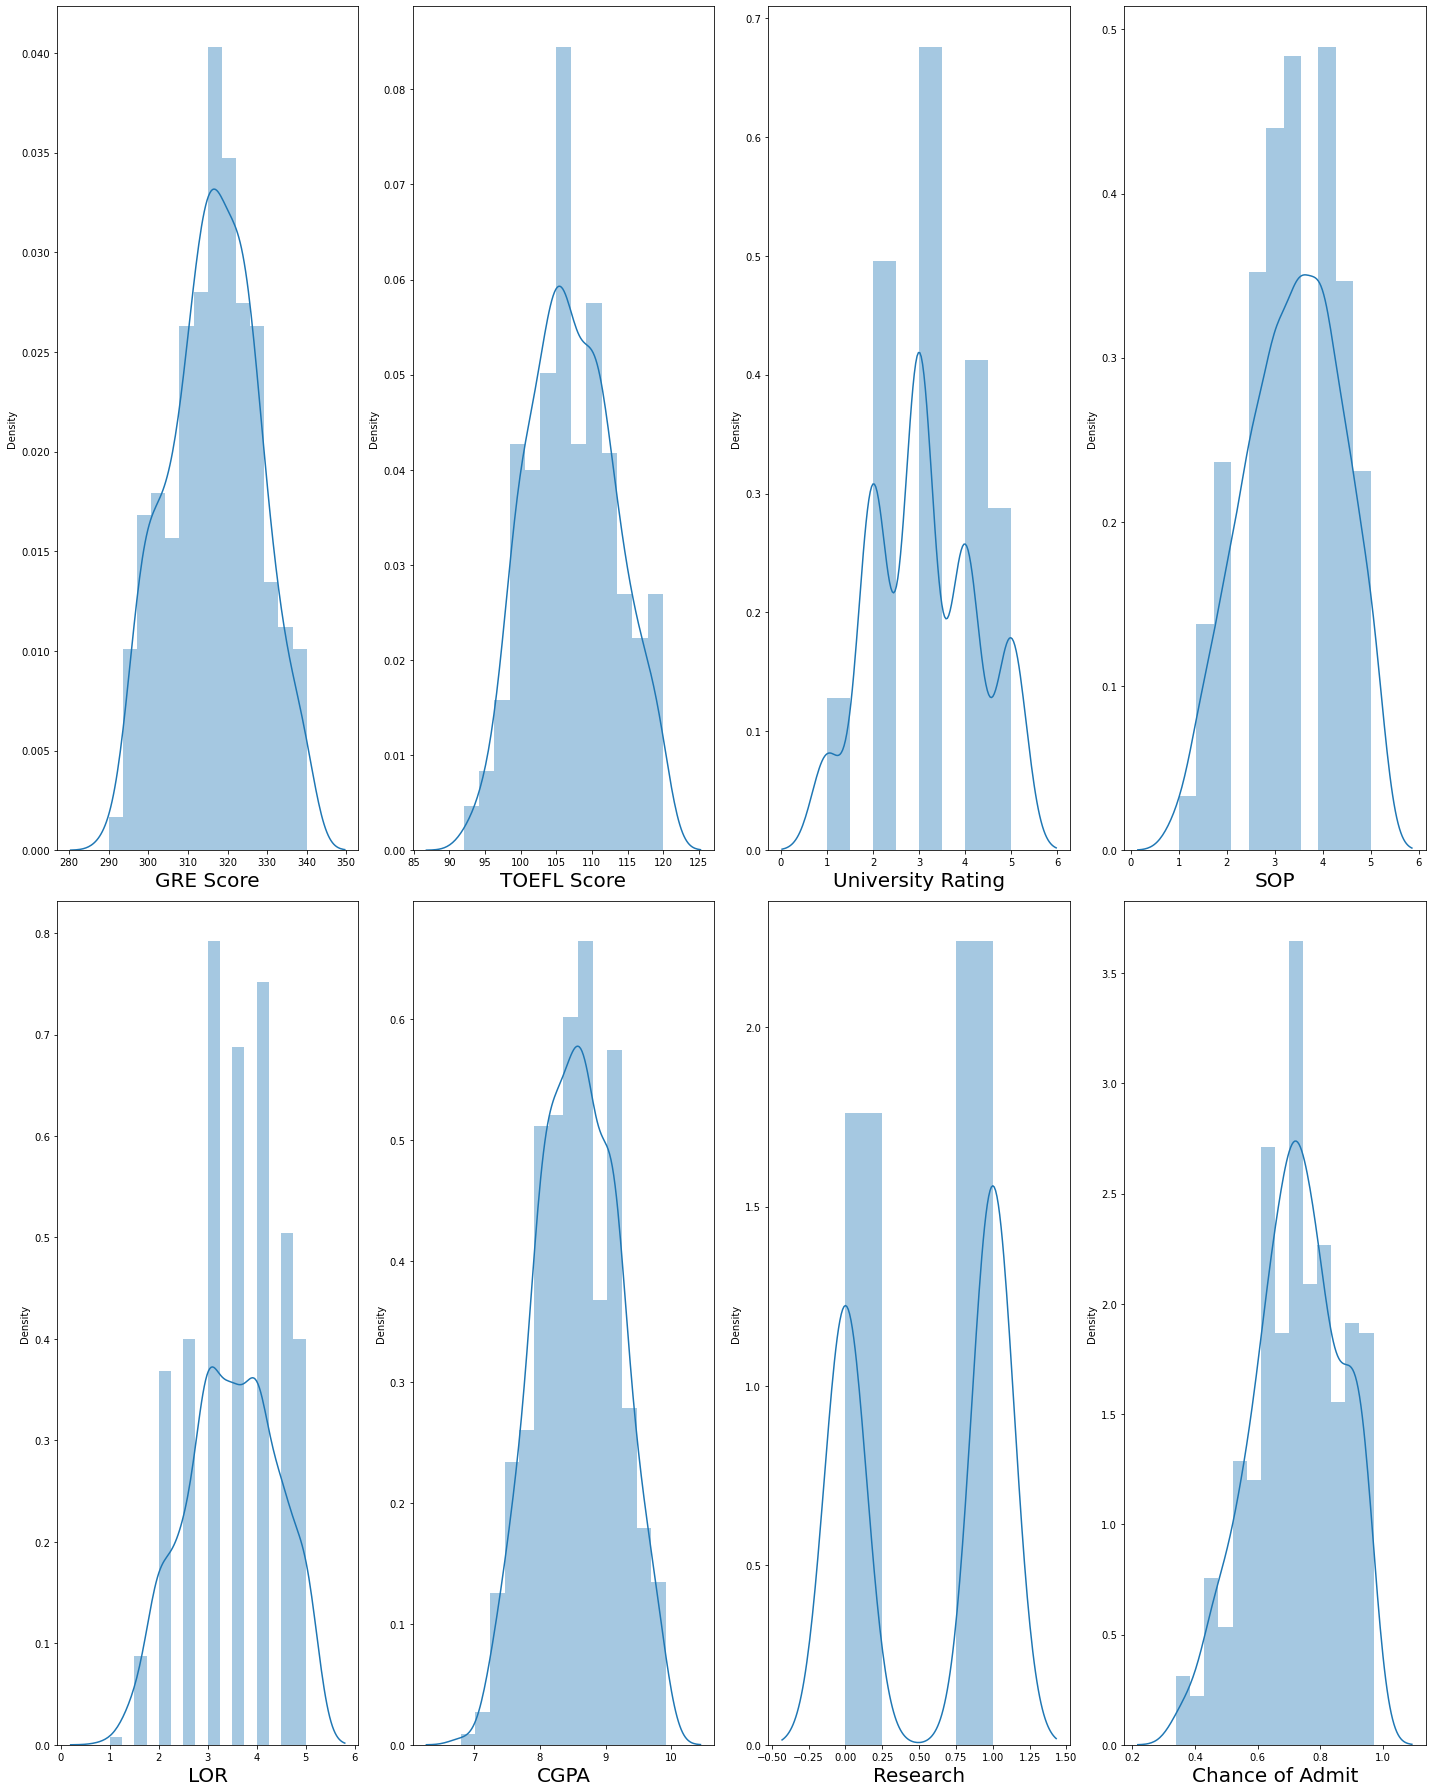

In [30]:
# lets see how data is distributed for every columns 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1     
plt.tight_layout()   

In [31]:
#devide data into features and label
y= data['Chance of Admit']
x=data.drop(columns=['Chance of Admit'])

In [32]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [33]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

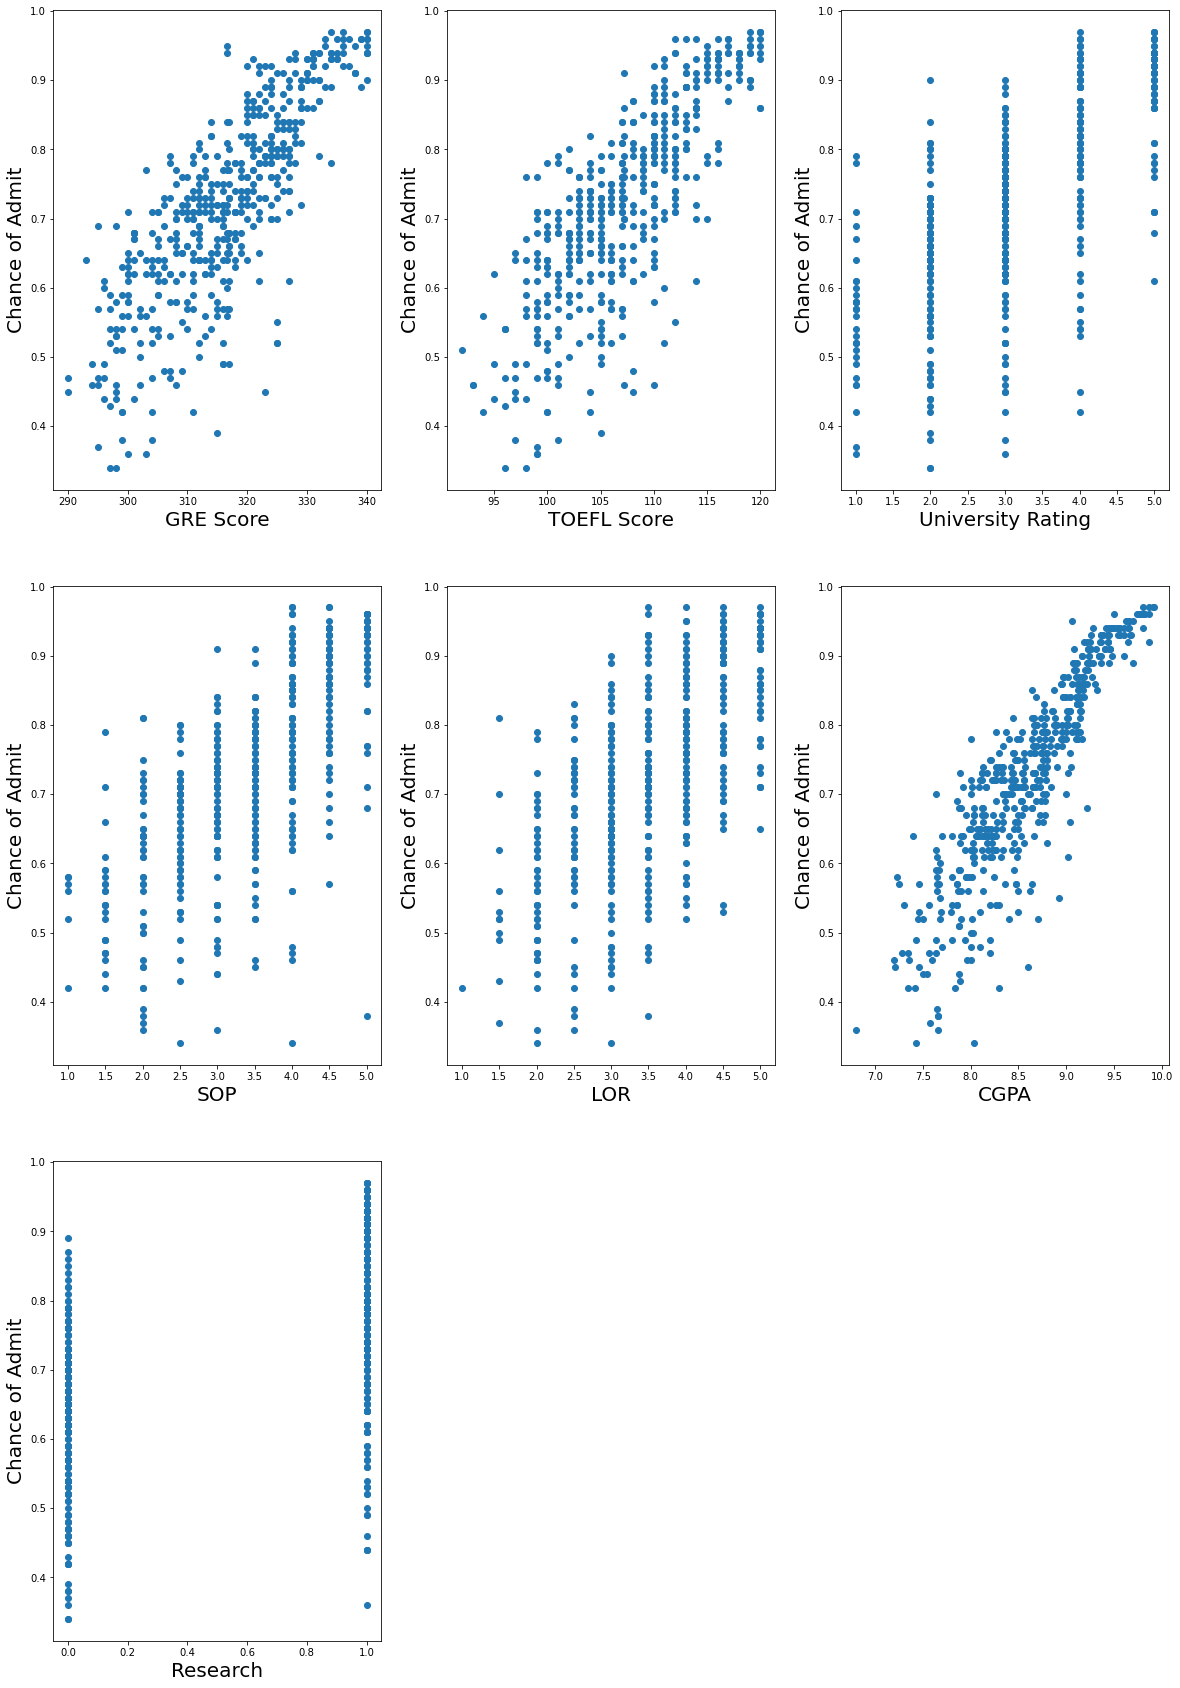

In [34]:
#visulazing relationship
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column ,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
        plotnumber+=1
plt.show()        

In [37]:
#Data scaling formulae Z=(x-mean/std)

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [38]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [15]:
#split data in train and test,model will be built on
x_train , x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=300)

In [24]:
y_train.head()

143    0.97
3      0.80
151    0.94
70     0.94
317    0.58
Name: Chance of Admit, dtype: float64

In [25]:
regression=LinearRegression()

In [26]:
regression.fit(x_train,y_train) #model is ready .fit behind the scene will act like gradient descet 

LinearRegression()

In [27]:
data.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76


In [28]:
print('Chance of admisson:' ,regression.predict(scaler.transform([[337.0, 118.0 ,4.0, 4.5, 4.5, 9.65, 1 ]])))

Chance of admisson: [0.94998094]


You Can save model and later on use it for prediction

In [41]:
#saving model 
filename='finalized_model.pickel'
pickle.dump(regression, open(filename,'wb'))

#prediction using save model 
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform ([[337.0, 118.0 ,4.0, 4.5, 4.5, 9.65, 1 ]]))
a

array([0.94998094])

In [42]:
#adjusted R2 score
regression.score(x_train,y_train)

0.8190878502404939

In [43]:
regression.score(x_test,y_test) #to check how much model is accurate .score behind the scene Adj R^2 will work

0.8110141919386119

In [44]:
#lets predict and visulize data
y_pred=regression.predict(x_test)

In [45]:
y_pred

array([0.74319789, 0.68125269, 0.47463823, 0.68690064, 0.95866444,
       0.89366728, 0.82199391, 0.73888879, 0.65547993, 0.80300992,
       0.5530384 , 0.64709757, 0.7186587 , 0.49461668, 0.83487107,
       0.7550238 , 0.60132171, 0.64570714, 0.52674293, 0.5929502 ,
       0.82982638, 0.83069621, 0.86276956, 0.72893523, 0.76847467,
       0.89977266, 0.77957117, 0.91165702, 0.58817745, 0.68743045,
       0.87211056, 0.95231618, 0.75093319, 0.49658988, 0.68923721,
       0.87817633, 0.68709599, 0.89802676, 0.47508453, 0.53389437,
       0.62058799, 0.83253508, 0.59851084, 0.56021202, 0.76625753,
       0.686033  , 0.63577618, 0.52855548, 0.83609921, 0.70934527,
       0.69105899, 0.53987286, 0.43946071, 0.59396793, 0.79274554,
       0.60988766, 0.8107556 , 0.63379945, 0.5521028 , 0.87120534,
       0.58876837, 0.50279228, 0.8616852 , 0.5204418 , 0.87323895,
       0.82388337, 0.6169985 , 0.80253019, 0.64242204, 0.54273595,
       0.45183118, 0.70787185, 0.78564203, 0.66666744, 0.63025

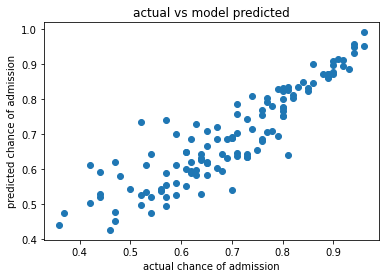

In [46]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [48]:
y_pred=regression.predict(x_test)


In [49]:
mean_absolute_error(y_test,y_pred)

0.04598952628305767

In [50]:
mean_squared_error(y_test,y_pred)

0.003958597729669663

In [51]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06291738813451861

Regularization in regression means is our model is over fitting means ,test question given from train question paper ,it means paper is leaked os accuracy is more that is called regularization. it is 2 type.
1.LASSO, Lasso is very harsh it remove coeffecinet which have less weightage
2.RIDGE,Ridge consider less weightage which have less contributaion in regression

In [53]:
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV 

In [54]:
lassocv=LassoCV(alphas=None, max_iter=100,normalize=True)# aplha is learning rate ,max_iter means how many time appear in 
lassocv.fit(x_train,y_train)                                            #exam ,normalize similar to scaling

LassoCV(max_iter=100, normalize=True)

In [56]:
alpha=lassocv.alpha_
alpha

6.2761207888389535e-06

In [57]:
#now with Lasso regression lets see how our data is fitted 
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=6.2761207888389535e-06)

In [58]:
lasso_reg.score(x_test,y_test)

0.8110241652785608

In [44]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [46]:
ridgecv.alpha_  #so 0.011 is less number means model is not overfitting ,model is doing its own job

0.011

In [48]:
ridge_model1=Ridge(alpha=ridgecv.alpha_)
ridge_model1.fit(x_test,y_test)

Ridge(alpha=0.011)

In [49]:
ridge_model1.score(x_test,y_test)

0.8395460858004503